In [1]:
import pickle as p
import numpy as np

In [99]:
def regplot(trans_scores, delta_sasas, colors, name, xlim = 0, ylim = 0):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.colorbar as colorbar
    import matplotlib.cm as cm
    from scipy.stats import linregress
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    import math
    
    x = np.array(trans_scores)
    y = np.array(delta_sasas)
    C = np.array(colors)
    alpha = np.zeros(x.shape)
    
    # for a,color in enumerate(colors):
    #     if color == ("red" or "magenta" or "purple"):
    #         alpha[a] = 1.0
    #     else:
    #         alpha[a] = 0.2

    # indicies = np.where(y < 0.8*y.max())
#     indicies = np.where(y == 0)

#     indicies = indicies[::-1]

#     for i in indicies:
#         x = np.delete(x, i)
#         y = np.delete(y, i)
#         C = np.delete(C, i)

    indicies = np.where(x < 1400)
    # indicies = indicies[::-1]

    for i in indicies:
        x = np.delete(x, i)
        y = np.delete(y, i)
        C = np.delete(C, i)
    
#     indicies = np.where(y > 10000)
#     indicies = indicies[::-1] 

#     for i in indicies:
#         x = np.delete(x, i)
#         y = np.delete(y, i)
#         C = np.delete(C, i)

    x = x.reshape((-1,1))

    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)

    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)
    
    pred_y = np.zeros(len(y), dtype=float)
    for ind,point in enumerate(x):
        pred_y[ind] = point*model.coef_ + model.intercept_
    
        
    MSE = mean_squared_error(y, pred_y)
 
    RMSE = math.sqrt(MSE)
    
    # scatter plot
    fig, ax = plt.subplots()
    plt.Figure.set_figheight(fig, plt.Figure.get_figheight(fig)+1)
    cmap = cm.get_cmap('hot')
    ax.scatter(x, y, 10, c=C, alpha=0.5, marker='o',
            label="Shrake-Rupley Grid SASA vs ΔSASA", cmap="hot")
    # regression plot
    rx = np.linspace(x.min(), x.max(), 165)
    ry = model.coef_*rx + model.intercept_

    ax.plot(rx, ry, '-r', label=f'y={float(model.coef_):.4f}*x + {float(model.intercept_):.2f}')
    plt.xlabel("Shrake-Rupley grid-based SASA")
    plt.ylabel("Delta_SASA (A^2)")
    ax.set_title(f'Shrake-Rupley Grid SASA score vs Shrake-Rupley R+L-C Delta SASA {chr(10)} Rotation:All{chr(10)} R2: {r_sq}, RMSE: {RMSE}')
    ax.legend(loc='upper left')
    # colorbar.ColorbarBase(ax,cmap=cmap,format='%.1f')
    if xlim != 0:
        x1,x2 = xlim
        plt.xlim(x1,x2)
    if ylim != 0:
        y1,y2 = ylim
        plt.ylim(y1,y2)
    plt.savefig(f'{name}', dpi=1200, pad_inches=1.)

In [24]:
def extract_scores(f):
    translations = []
    trans_scores = []
    delta_sasas = []
    colors = []
    for i in range(101):
        keys = list(f[i].keys())
        for key in keys:
            if key == "translations":
                translations.extend(f[i][key])
            elif key == "trans_scores":
                trans_scores.extend(f[i][key])
            elif key == "delta_sasas":
                delta_sasas.extend(f[i][key])
            else:
                colors.extend(f[i][key])
    return translations, trans_scores, delta_sasas, colors


In [25]:
def extract_scores_single(f):
    translations = []
    trans_scores = []
    delta_sasas = []
    colors = []
    keys = list(f.keys())
    for key in keys:
        if key == "translations":
            translations.extend(f[key])
        elif key == "trans_scores":
            trans_scores.extend(f[key])
        elif key == "delta_sasas":
            delta_sasas.extend(f[key])
        else:
            colors.extend(f[key])
    return translations, trans_scores, delta_sasas, colors

In [91]:
f = p.load(open("/home/jim/src/p39/fftanalysis/plots/Shrake-Rupley-FullCore/rotations.p", "rb"))

coefficient of determination: 0.9993463683822046
intercept: 6.681228744198961
slope: [0.99622753]


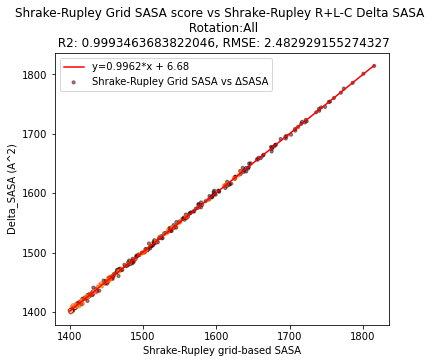

In [100]:
name = "/home/jim/src/p39/fftanalysis/plots/Shrake-Rupley-FullCore/2OOB_A_above_1400.jpg"
a,b,c,d = extract_scores(f)
# regplot(b,c,d,name,ylim=(380,2100))
regplot(b,c,d,name)

In [22]:
print(b[0]*(1.0036069) + 0.011820951733739093, b[0])

[1011.08925248] [1007.44368291]


coefficient of determination: 0.32865512113608886
intercept: 155.10642285423387
slope: [0.14871795]


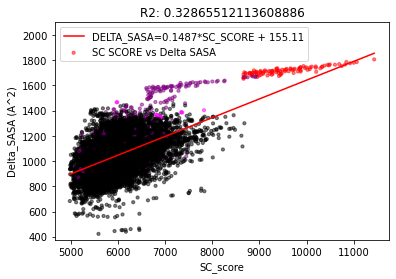

In [30]:
name2 = "/home/jim/src/p39/fftanalysis/plots/dSASA_0_5/2OOB_A.jpg"
f2 = p.load(open("/home/jim/src/p39/fftanalysis/plots/DeltaSASAvSCORE_new/rotations.p", "rb"))
e,f,g,h = extract_scores(f2)
regplot(f,g,h, name2)

In [33]:
delta_sasa_array = np.load("/home/jim/src/p39/jupyter/fftanalysis/delta_sasa_complex_minus_rl.npy")
scores = np.load("/home/jim/src/p39/jupyter/fftanalysis/scores.npy")

<ipython-input-63-c9de255b6965>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(trans_scores)


coefficient of determination: 0.5074297235863102
intercept: -324.4113273093378
slope: [1.87115195]


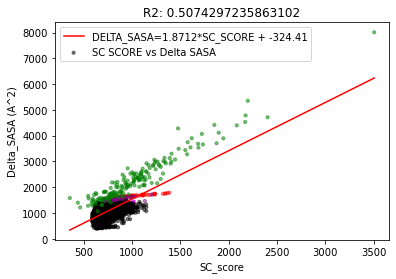

In [67]:
b.extend(list(scores))
c.extend(list(delta_sasa_array*100))
d.extend(['green']*len(scores))
name = "/home/jim/src/p39/fftanalysis/plots/dSASA_0_5/2OOB_A_ALL_OVERLAY.jpg"
regplot(b,c,d,name)

In [47]:
print(delta_sasa_array.shape, scores.shape)

(179,) (179,)


In [68]:
f3 = p.load(open("/home/jim/src/p39/fftanalysis/plots/DeltaSASAvSCORE_10point/2OOB_A_200_200.p", "rb"))

coefficient of determination: 0.31106240762208437
intercept: 154.27960757514472
slope: [0.15189597]


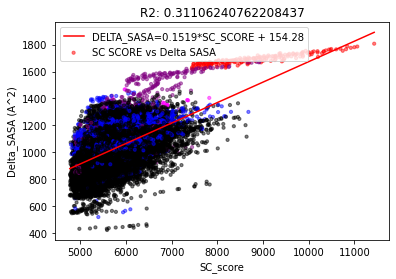

In [77]:
i,j,k,l = extract_scores_single(f3)
name = "/home/jim/src/p39/fftanalysis/plots/dSASA_0_5/2OOB_A_BANDING.jpg"
regplot(j,k,l,name)